<a href="https://colab.research.google.com/github/Jucicarla/APE/blob/main/aula_3_APE_dadosNBal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Disciplina: Aquisição, Pré-processamento e Extração de Dados**
 
**Assunto: Dados não balanceados**

Exemplo:
Dataset: winequality red.csv
https://www.kaggle.com/uciml/red wine quality cortez et al 2009 conjunto de dados sobre vinhos 1599

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler,NearMiss, OneSidedSelection
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


In [59]:
df_wine = pd.read_csv('/content/drive/MyDrive/winequality-red.csv')

In [60]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


existe um desbalanceamento na qualidade vinho: baixa e alta qualidade

In [61]:
df_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


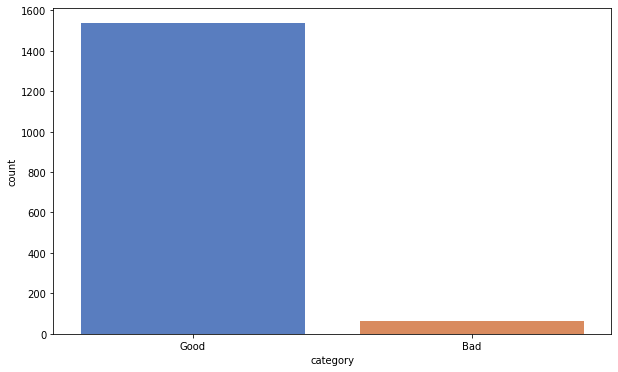

In [62]:
quality = df_wine['quality'].values
category = []
for num in quality:
  if num<5:
    category.append('Bad')
  else:
    category.append('Good')

#Create new Data
category = pd.DataFrame(data=category, columns=['category'])
df_wine = pd.concat([df_wine, category], axis=1)
df_wine.drop(columns='quality',axis=1,inplace=True)

plt.figure(figsize=(10,6))
sns.countplot(df_wine['category'], palette='muted')



In [63]:
df_wine['category'].value_counts()

Good    1536
Bad       63
Name: category, dtype: int64

processo para deixar mais balanceado

**Métodos para lidar com dados desbalanceados:**

1- Reestruturação dos Dados: manipular a quantidade de dados que são efetivamente utilizados pelo modelo, tentando igualar o número de observações entre as classes


*   Undersampling: reduzir o número de observações de classe majoritária
*   Oversampling: criar sinteticamente novas observações da classe minoritária



*Undersampling*
 - Random Undersampler
 - NearMIss
 - OndeSidedSelection 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

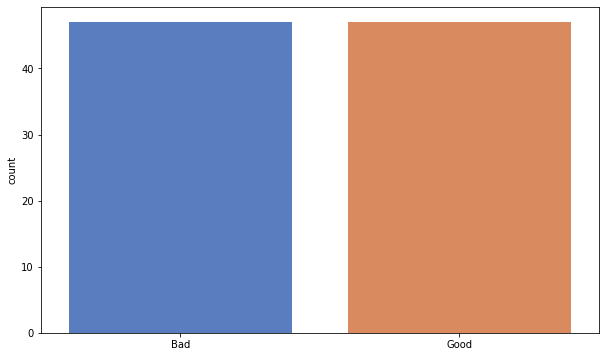

In [64]:
X = df_wine.drop('category', axis=1)
y = df_wine['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

#Random Undersampler: aleartoriamente com ou sem substituição
rus = RandomUnderSampler()
X_rus_res, y_rus_res = rus.fit_resample(X_train, y_train)

#NearMIss: usando vizinhos mais proximo(kNN)
nm = NearMiss()
X_nm_res, y_nm_res = nm.fit_resample(X_train, y_train)

#OndeSidedSelection (Algoritmo tipo KNN): seleção unilateral
oss = OneSidedSelection()
#X_oss_res, y_oss_res = oss.fit.resample(X_train, y_train)
plt.figure(figsize=(10,6))
sns.countplot(y_rus_res, palette='muted')


-Ao final a intenção é ter a mesma quantidade de vinho bom e ruim.

*Oversampling*
  - Cópia de dados já existentes: duplicar observaçãoes
  - SMOTE: criar observações intermediarias entre dados parecedido


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


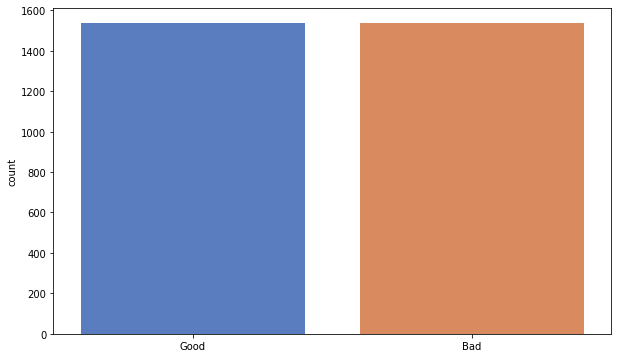

In [65]:
X = df_wine.drop('category', axis=1)
y = df_wine['category']

X_train, X_test, y_train, y_tes = train_test_split(X, y, stratify=y, shuffle=True)

#SMOTE
smote = SMOTE(random_state= 32)
X_smote_res, y_smote_res = smote.fit_resample(X,y)

plt.figure(figsize=(10,6))
sns.countplot(y_smote_res, palette='muted')

Os dados deixam de está desbalanceados.

Exercicio: 
- Analisar o Balanceamento dos dados considerando a classe Sexo

- Utilizar alguam técnica para solucionar qualquer problema de balanceamento dos dados.

In [89]:
df_candidatos = pd.read_csv("/content/drive/MyDrive/candidatos_deputados_2014_final.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (27,30,37,41,47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [90]:
df_candidatos.head(2)

,SIGLA_UF,CODIGO_CARGO,DESCRICAO_CARGO,NOME_CANDIDATO,SEQUENCIAL_CANDIDATO,COD_SITUACAO_CANDIDATURA,DES_SITUACAO_CANDIDATURA,NUMERO_PARTIDO,CODIGO_LEGENDA,CODIGO_OCUPACAO,DESCRICAO_OCUPACAO,IDADE_DATA_ELEICAO,CODIGO_SEXO,DESCRICAO_SEXO,COD_GRAU_INSTRUCAO,DESCRICAO_GRAU_INSTRUCAO,CODIGO_ESTADO_CIVIL,DESCRICAO_ESTADO_CIVIL,CODIGO_COR_RACA,DESCRICAO_COR_RACA,CODIGO_NACIONALIDADE,DESCRICAO_NACIONALIDADE,DESPESA_MAX_CAMPANHA,COD_SIT_TOT_TURNO,DESC_SIT_TOT_TURNO,VALOR_BEM,SETOR_A,SETOR_B,SETOR_C,SETOR_D,SETOR_E,SETOR_F,SETOR_G,SETOR_H,SETOR_I,SETOR_J,SETOR_K,SETOR_L,SETOR_M,SETOR_N,SETOR_O,SETOR_P,SETOR_Q,SETOR_R,SETOR_S,SETOR_NAO_IDENTIFICADO,TP_RECEITA_APLICACAO,TP_RECEITA_EVENTO,TP_RECEITA_FISICA,TP_RECEITA_INTERNET,TP_RECEITA_JURIDICA,TP_RECEITA_NAO_IDENTIFICADA,TP_RECEITA_OUTRO,TP_RECEITA_PARTIDO,TP_RECEITA_PROPRIO,VALOR_RECEITA
0,AC,7,DEPUTADO ESTADUAL,BENEDITO SILVA BARBOSA,10000000504,2,DEFERIDO,23,10000000034,266,PROFESSOR DE ENSINO MÉDIO,46,2,MASCULINO,8,SUPERIOR COMPLETO,9,DIVORCIADO(A),3,PARDA,1,BRASILEIRA NATA,1000000,5,SUPLENTE,210000.0,0.0,0.0,0.0,0.0,0.0,490.5,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,200.0,1500.0,0.0,0,0.0,0.0,0.0,0.0,0.0,690.5,1500.0,2190.5
1,AC,7,DEPUTADO ESTADUAL,MARIA APARECIDA ALVES DE SOUZA,10000000055,2,DEFERIDO,12,10000000021,254,VIGILANTE,32,4,FEMININO,6,ENSINO MÉDIO COMPLETO,1,SOLTEIRO(A),3,PARDA,1,BRASILEIRA NATA,600000,5,SUPLENTE,38918.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,821.88,0.0,0.0,0,0.0,0.0,0.0,0.0,821.88,0.0,0.0,821.88


In [68]:
df_candidatos.columns

Index(['SIGLA_UF', 'CODIGO_CARGO', 'DESCRICAO_CARGO', 'NOME_CANDIDATO',
       'SEQUENCIAL_CANDIDATO', 'COD_SITUACAO_CANDIDATURA',
       'DES_SITUACAO_CANDIDATURA', 'NUMERO_PARTIDO', 'CODIGO_LEGENDA',
       'CODIGO_OCUPACAO', 'DESCRICAO_OCUPACAO', 'IDADE_DATA_ELEICAO',
       'CODIGO_SEXO', 'DESCRICAO_SEXO', 'COD_GRAU_INSTRUCAO',
       'DESCRICAO_GRAU_INSTRUCAO', 'CODIGO_ESTADO_CIVIL',
       'DESCRICAO_ESTADO_CIVIL', 'CODIGO_COR_RACA', 'DESCRICAO_COR_RACA',
       'CODIGO_NACIONALIDADE', 'DESCRICAO_NACIONALIDADE',
       'DESPESA_MAX_CAMPANHA', 'COD_SIT_TOT_TURNO', 'DESC_SIT_TOT_TURNO',
       'VALOR_BEM', 'SETOR_A', 'SETOR_B', 'SETOR_C', 'SETOR_D', 'SETOR_E',
       'SETOR_F', 'SETOR_G', 'SETOR_H', 'SETOR_I', 'SETOR_J', 'SETOR_K',
       'SETOR_L', 'SETOR_M', 'SETOR_N', 'SETOR_O', 'SETOR_P', 'SETOR_Q',
       'SETOR_R', 'SETOR_S', 'SETOR_NAO_IDENTIFICADO', 'TP_RECEITA_APLICACAO',
       'TP_RECEITA_EVENTO', 'TP_RECEITA_FISICA', 'TP_RECEITA_INTERNET',
       'TP_RECEITA_JURIDICA', 

In [78]:
df_candidatos['DESCRICAO_SEXO'].value_counts()

MASCULINO    14962
FEMININO      6162
Name: DESCRICAO_SEXO, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


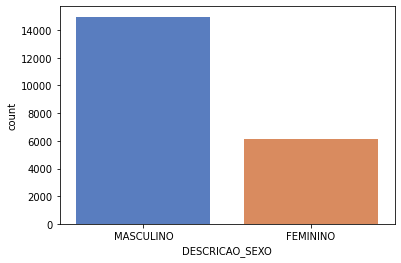

In [88]:
sns.countplot(df_candidatos['DESCRICAO_SEXO'], palette='muted')

Pegamos duas colunas, que não tem NAn

In [108]:
#criação de um novo df, para não pegar Nan, se não dar erro...
df_candid = df_candidatos[['SIGLA_UF', 'DESCRICAO_SEXO']]
df_candid['DESCRICAO_SEXO'] = df_candidatos['DESCRICAO_SEXO'].astype('string')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Para balancear

In [105]:
#nossa classe
X = df_candid.drop('DESCRICAO_SEXO', axis=1)
y = df_candid['DESCRICAO_SEXO']

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


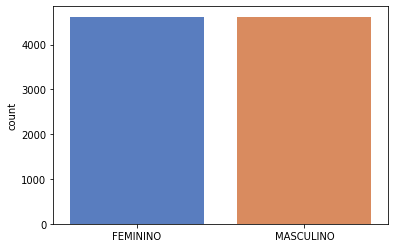

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)
#Random Undersampler: aleartoriamente com ou sem substituição
rus = RandomUnderSampler()
X_rus_res, y_rus_res = rus.fit_resample(X_train, y_train)
sns.countplot(y_rus_res, palette='muted')